In [1]:
# Imports
from Q1 import Simulation
import numpy as np
import pandas as pd
from openmm import unit
import matplotlib.pyplot as plt

In [2]:
#####Parameters
steps = 1000                        # Number of Simulation Steps/Frames Simulated/Rendered (Unitless) (Integer)
skipSteps = 1                       # The Step Size of each Frame Generated (Unitless) (Integer)
Temperature=225.                    # Temperature at which the simulation is simulated (Kelvin)
dt = 0.001 # * unit.femtoseconds       # The Change in Time between each Frame (Femtoseconds)
nonbondedCutoff=1e3*unit.nanometer  # Distance constituting a Bond between Atoms (Nanometers)
ensemble='NVE'                      # NVE or NVT Ensemble Type (Unitless) (String)
#####

#"Progress (%)"	"Step"	"Potential Energy (kJ/mole)"	"Temperature (K)"	"Speed (ns/day)"	"Time Remaining"
0.1%	1	-28.189446641510756	248.74319817117538	--	--
0.2%	2	-28.189436038454115	248.74302813784274	0.0288	0:02
0.3%	3	-28.18941837348129	248.74274485586983	0.0288	0:02
0.4%	4	-28.18939364637523	248.74234832457782	0.0324	0:02
0.5%	5	-28.189361856932337	248.7418385389321	0.0288	0:02
0.6%	6	-28.189323004962173	248.74121549528903	0.0309	0:02
0.7%	7	-28.189277090288137	248.74047919258928	0.0305	0:02
0.8%	8	-28.18922411274731	248.739629627374	0.0302	0:02
0.9%	9	-28.189164072189477	248.73866679729716	0.0314	0:02
1.0%	10	-28.189096968478502	248.73759070209482	0.0311	0:02
1.1%	11	-28.18902280149163	248.73640133551635	0.032	0:02
1.2%	12	-28.18894157111985	248.73509869831713	0.0317	0:02
1.3%	13	-28.1888532772671	248.73368278953305	0.0314	0:02
1.4%	14	-28.18875791985123	248.73215360888818	0.0312	0:02
1.5%	15	-28.188655498803154	248.7305111538723	0.031	0:02
1.6%	16	-28.18854601406777	248.728755422

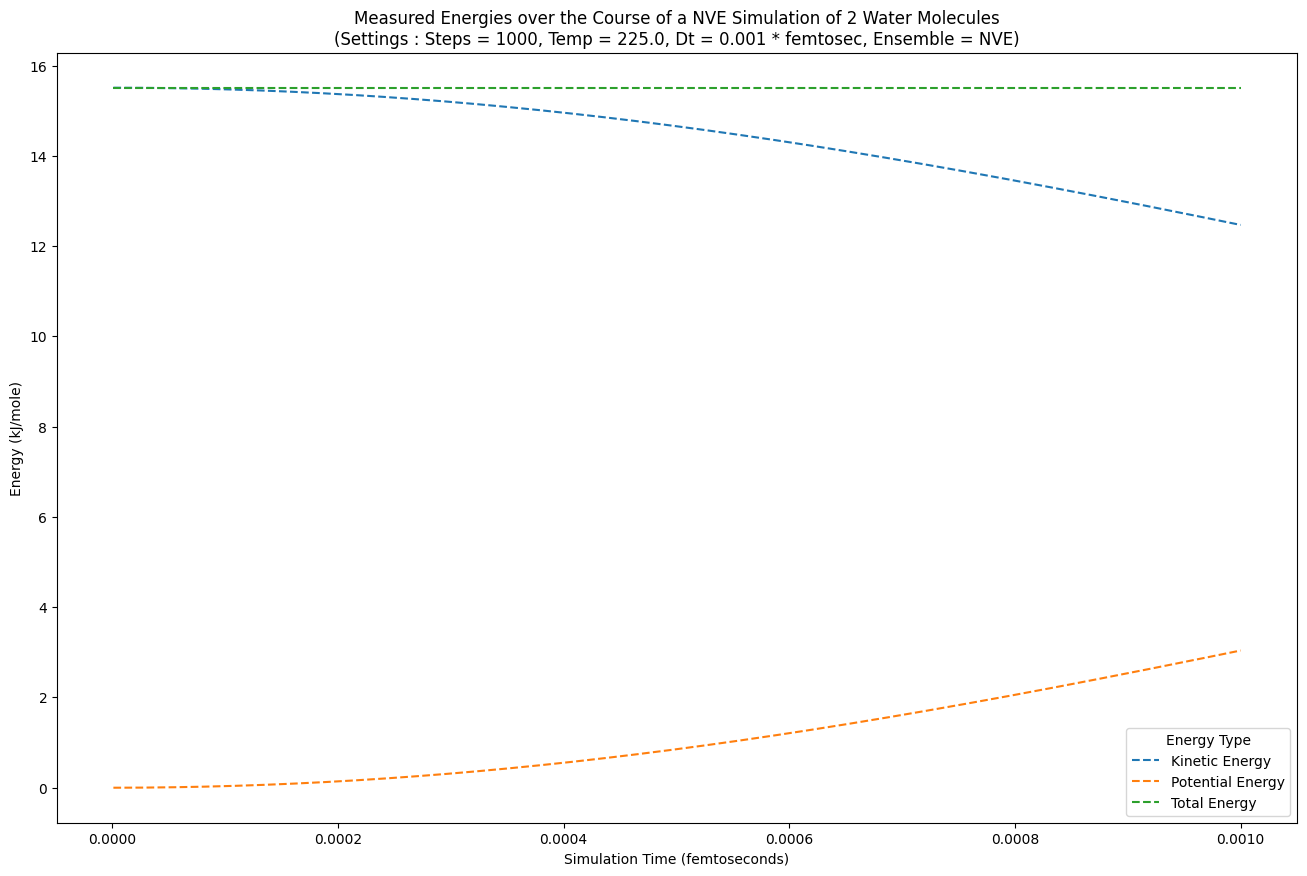

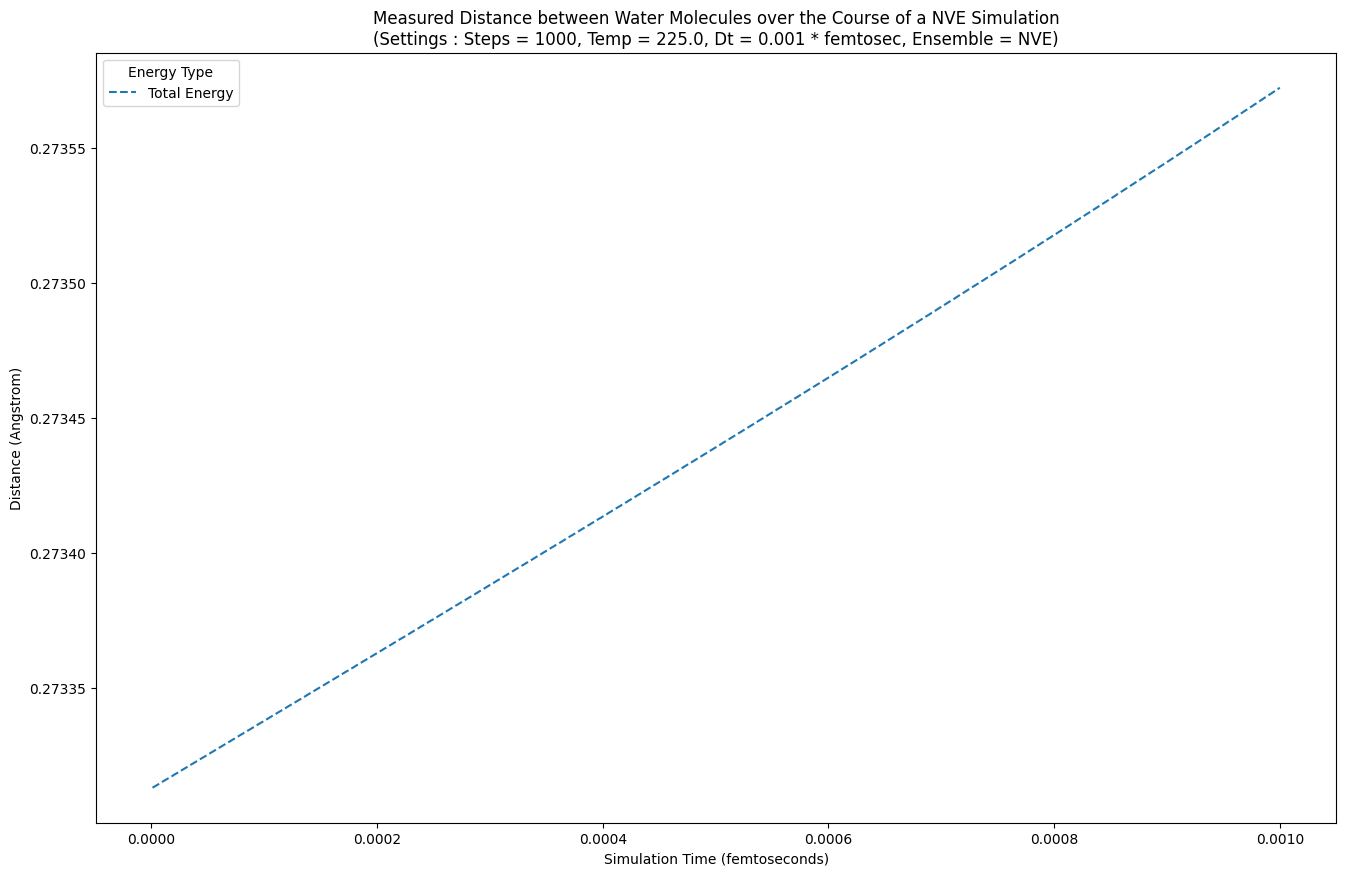

,Type,Kinetic Energy,Potential Energy,Total Energy
0,Average (kJ/mol),14.430565,1.080681,1.551125e+01
1,Variance (kJ/mol),0.862181,0.862181,3.770360e-13


,Type,Average,Variance
0,Distance (Angstrom),0.27344,5.576624e-09


In [3]:
def Q1_2 (steps, Temperature, dt, ensemble, nonbondedCutoff):
    # Simulate
    Simulation(steps, Temperature, dt, ensemble, nonbondedCutoff)
    
    # Extract the Data from the Outputed Files
    KE = pd.read_csv("KE.NVE", sep=' ', header=None, names=['Time', 'Energy'])
    PE = pd.read_csv("PE.NVE", sep=' ', header=None, names=['Time', 'Energy'])
    TE = pd.read_csv("TE.NVE", sep=' ', header=None, names=['Time', 'Energy'])
    OODist = pd.read_csv("rOO.NVE", sep=' ', header=None, names=['Time', 'Distance'])

    # Add the Type of Energy to the Dataframes
    KE["Type"] = "Kinetic Energy"
    PE["Type"] = "Potential Energy"
    TE["Type"] = "Total Energy"
    OODist["Type"] = "Total Energy"

    # Plot Energy Graph of System
    plt.figure(figsize=(16, 10))
    plt.ylabel(f"Energy (kJ/mole)")
    plt.xlabel(f"Simulation Time (femtoseconds)")
    plt.plot(KE["Time"], KE["Energy"], "--", label=KE["Type"][0])
    plt.plot(PE["Time"], PE["Energy"], "--", label=PE["Type"][0])
    plt.plot(TE["Time"], TE["Energy"], "--", label=TE["Type"][0])
    plt.title(f"Measured Energies over the Course of a NVE Simulation of 2 Water Molecules\n(Settings : Steps = {steps}, Temp = {Temperature}, Dt = {dt} * femtosec, Ensemble = {ensemble})")
    plt.legend(title="Energy Type")
    plt.savefig("Q1_2.png")
    plt.show()
    
    # Plot Distance Graph of System
    plt.figure(figsize=(16, 10))
    plt.ylabel(f"Distance (Angstrom)")
    plt.xlabel(f"Simulation Time (femtoseconds)")
    plt.plot(OODist["Time"], OODist["Distance"], "--", label=OODist["Type"][0])
    plt.title(f"Measured Distance between Water Molecules over the Course of a NVE Simulation\n(Settings : Steps = {steps}, Temp = {Temperature}, Dt = {dt} * femtosec, Ensemble = {ensemble})")
    plt.legend(title="Energy Type")
    plt.savefig("Q1_4.png")
    plt.show()
        
    # Get Average and Variance of Each Energy Type
    KE_AVG = np.average(KE["Energy"])
    KE_VAR = np.var(KE["Energy"])

    PE_AVG = np.average(PE["Energy"])
    PE_VAR = np.var(PE["Energy"])

    TE_AVG = np.average(TE["Energy"])
    TE_VAR = np.var(TE["Energy"])

    OO_AVG = np.average(OODist["Distance"])
    OO_VAR = np.var(OODist["Distance"])
    
    # Put into a Dataframe
    AVGAndVAR = pd.DataFrame({
        "Type" : ["Average (kJ/mol)", "Variance (kJ/mol)"],
        "Kinetic Energy" : [KE_AVG, KE_VAR],
        "Potential Energy" : [PE_AVG, PE_VAR],
        "Total Energy" : [TE_AVG, TE_VAR],
    })
    
    OODistDF = pd.DataFrame({
        "Type": ["Distance (Angstrom)"],
        "Average" : [OO_AVG],
        "Variance" : [OO_VAR]
    })

    # Print the Dataframe
    display(AVGAndVAR)
    display(OODistDF)
    
Q1_2(steps, Temperature, dt, ensemble, nonbondedCutoff)

In [4]:
def Q1_3 (steps, Temperature, dt, ensemble, nonbondedCutoff):
    # Simulate
    Simulation(steps, Temperature, dt, ensemble, nonbondedCutoff)
    
    # Extract the Data from the Outputed Files
    KE = pd.read_csv("KE.NVE", sep=' ', header=None, names=['Time', 'Energy'])
    PE = pd.read_csv("PE.NVE", sep=' ', header=None, names=['Time', 'Energy'])
    TE = pd.read_csv("TE.NVE", sep=' ', header=None, names=['Time', 'Energy'])

    # Add the Type of Energy to the Dataframes
    KE["Type"] = "Kinetic Energy"
    PE["Type"] = "Potential Energy"
    TE["Type"] = "Total Energy"

    # Get Average and Variance of Each Energy Type
    KE_AVG = np.average(KE["Energy"])
    KE_VAR = np.var(KE["Energy"])

    PE_AVG = np.average(PE["Energy"])
    PE_VAR = np.var(PE["Energy"])

    TE_AVG = np.average(TE["Energy"])
    TE_VAR = np.var(TE["Energy"])
    
    return [dt, KE_AVG, KE_VAR, PE_AVG, PE_VAR, TE_AVG, TE_VAR]

#"Progress (%)"	"Step"	"Potential Energy (kJ/mole)"	"Temperature (K)"	"Speed (ns/day)"	"Time Remaining"
0.1%	1	-28.189448154287412	125.3740476931761	--	--
0.2%	2	-28.189442183556686	125.37395194321854	0.0432	0:01
0.3%	3	-28.18943227080591	125.3737929793515	0.0432	0:01
0.4%	4	-28.189418416157633	125.37357080174866	0.0432	0:01
0.5%	5	-28.189400619740635	125.37328541354714	0.0384	0:02
0.6%	6	-28.189378881688945	125.37293681533978	0.036	0:02
0.7%	7	-28.18935320214323	125.37252501028081	0.0346	0:02
0.8%	8	-28.189323581249973	125.372050001252	0.0336	0:02
0.9%	9	-28.189290019161586	125.37151178908867	0.0346	0:02
1.0%	10	-28.189252516036746	125.37091037791645	0.0353	0:02
1.1%	11	-28.189211072039708	125.3702457698069	0.0346	0:02
1.2%	12	-28.189165687341408	125.36951796774956	0.0339	0:02
1.3%	13	-28.189116362118355	125.3687269730211	0.0334	0:02
1.4%	14	-28.189063096552992	125.36787278933262	0.033	0:02
1.5%	15	-28.189005890834093	125.36695542009588	0.0336	0:02
1.6%	16	-28.188944745156302	125.3659

,Dt (Femtoseconds),KE Average (kJ/mol),KE Variance (kJ/mol),PE Average (kJ/mol),PE Variance (kJ/mol),TE Average (kJ/mol),TE Variance (kJ/mol)
0,0.001,7.212472,0.273346,0.605661,0.273346,7.818133,6.294937e-13
1,0.002,39.148693,3.601529,2.484010,3.601532,41.632705,6.713856e-12
2,0.004,5.229599,4.411346,3.838062,4.411356,9.067661,7.638719e-12
3,0.008,9.949051,3.676405,4.302512,3.676454,14.251564,1.727636e-10
4,0.016,10.924426,6.402050,5.095302,6.402373,16.019728,4.429682e-09
5,0.032,5.227367,1.556884,3.087577,1.557116,8.314944,1.344160e-08
6,0.064,10.362738,14.131399,9.096015,14.142991,19.458753,2.706738e-06
7,0.128,5.879011,2.305756,4.175713,2.311915,10.054724,5.066778e-06
8,0.256,6.787176,2.615397,4.660164,2.650613,11.447340,1.419078e-04
9,0.512,5.493743,1.355078,2.788650,1.429694,8.282393,1.215360e-03


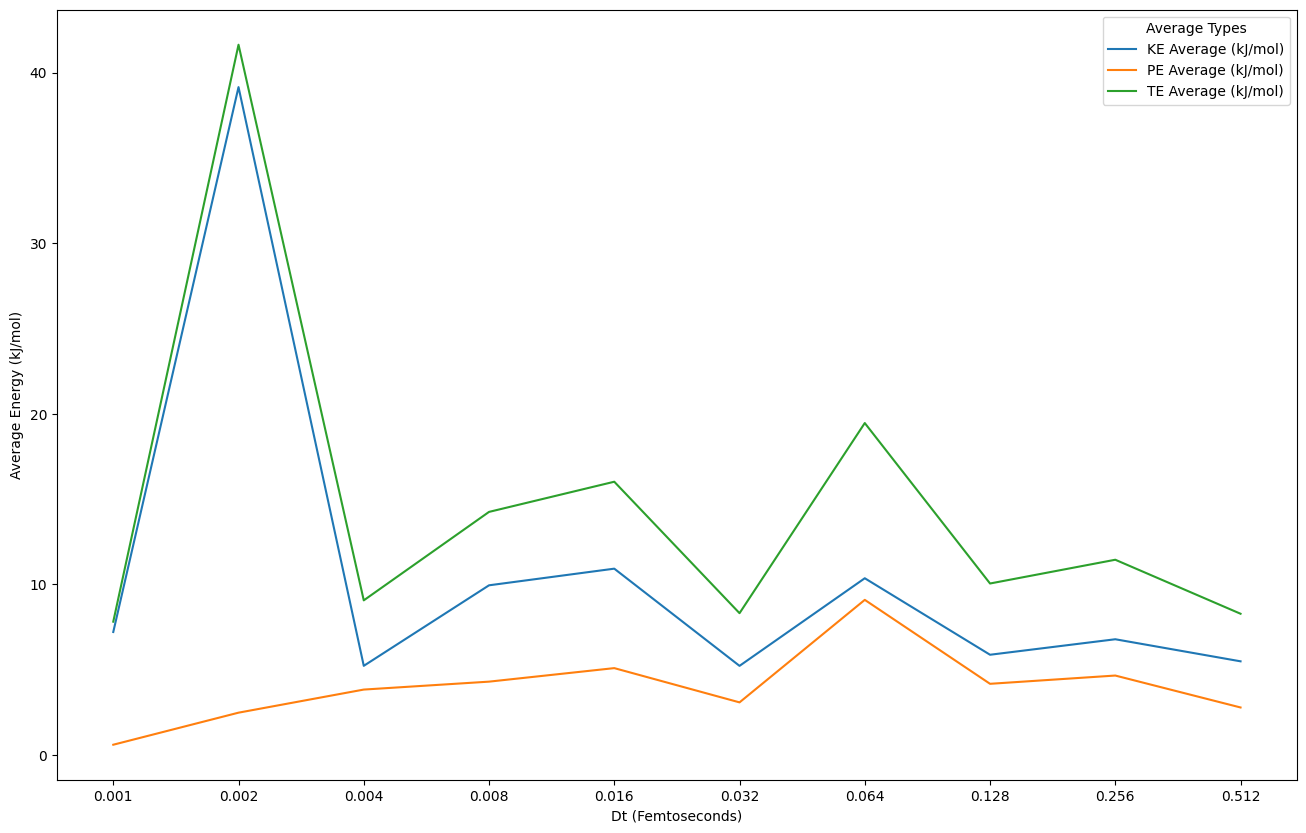

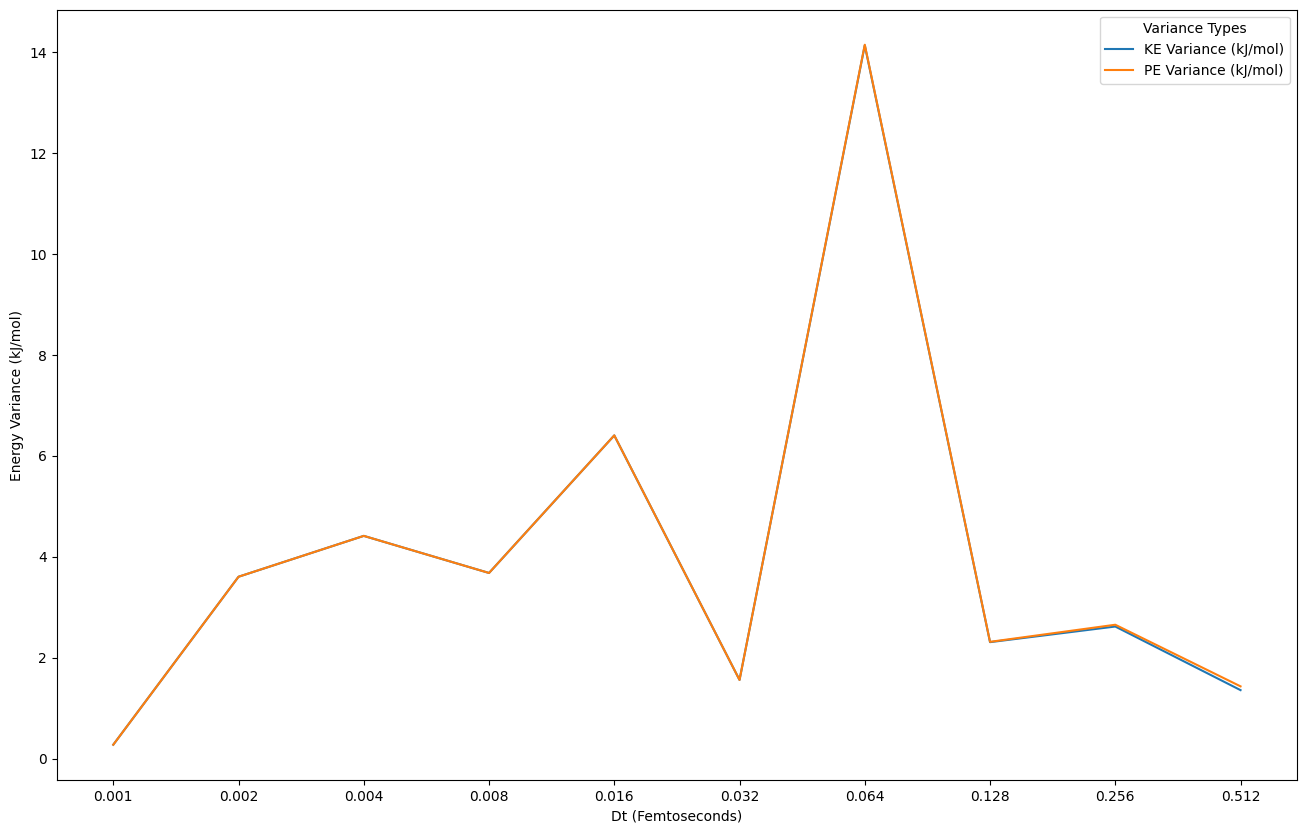

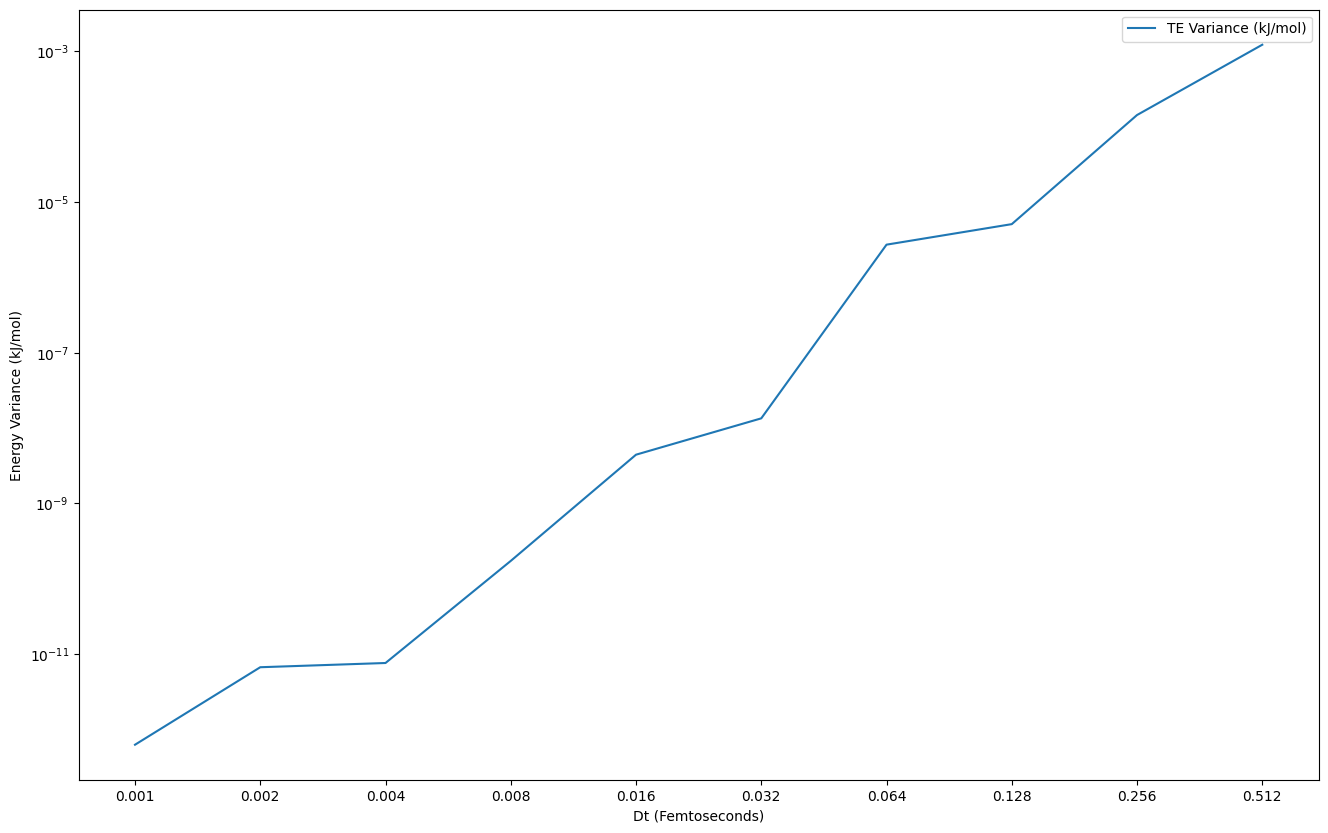

#"Progress (%)"	"Step"	"Potential Energy (kJ/mole)"	"Temperature (K)"	"Speed (ns/day)"	"Time Remaining"
0.1%	1	-28.189447958375172	140.43227226849723	--	--
0.2%	2	-28.189441343408845	140.43216619069054	0.0429	0:02
0.3%	3	-28.189430337993283	140.43198970352537	0.043	0:02
0.4%	4	-28.18941494214612	140.43174281262043	0.0431	0:01
0.5%	5	-28.18939515589323	140.43142551455273	0.0431	0:01
0.6%	6	-28.189370979268215	140.43103780909877	0.0431	0:01
0.7%	7	-28.189342412312634	140.43057970242185	0.0399	0:02
0.8%	8	-28.18930945507568	140.43005119070762	0.0403	0:02
0.9%	9	-28.1892721076147	140.4294522754254	0.0406	0:02
1.0%	10	-28.18923036999455	140.42878295892962	0.0389	0:02
1.1%	11	-28.189184242288327	140.42804323992064	0.0392	0:02
1.2%	12	-28.189133724576905	140.42723312185905	0.0396	0:02
1.3%	13	-28.18907881694855	140.42635260695056	0.0384	0:02
1.4%	14	-28.189019519500256	140.42540169408878	0.0374	0:02
1.5%	15	-28.18895583233586	140.42438038609276	0.0378	0:02
1.6%	16	-28.188887755567926	140.4232

KeyboardInterrupt: 

In [ ]:
def AVGVARTrends (ensembleType, change: str):
    #####Parameters
    steps = 1000                       # Number of Simulation Steps/Frames Simulated/Rendered (Unitless) (Integer)
    skipSteps = 1                       # The Step Size of each Frame Generated (Unitless) (Integer)
    Temperature=225.                    # Temperature at which the simulation is simulated (Kelvin)
    dt = 0.001 # * unit.femtoseconds       # The Change in Time between each Frame (Femtoseconds)
    nonbondedCutoff=1e3*unit.nanometer  # Distance constituting a Bond between Atoms (Nanometers)
    ensemble=ensembleType                      # NVE or NVT Ensemble Type (Unitless) (String)
    #####

    if change == "DT":
        columnHeaders = ["Dt (Femtoseconds)", "KE Average (kJ/mol)", "KE Variance (kJ/mol)", "PE Average (kJ/mol)", "PE Variance (kJ/mol)", "TE Average (kJ/mol)", "TE Variance (kJ/mol)"]
        xIndex = "Dt (Femtoseconds)"
    else:
        columnHeaders = ["Steps", "KE Average (kJ/mol)", "KE Variance (kJ/mol)", "PE Average (kJ/mol)", "PE Variance (kJ/mol)", "TE Average (kJ/mol)", "TE Variance (kJ/mol)"]
        xIndex = "Steps"

    results = []
    
    # Loop through 8 Times
    for i in range(8):
        results.append(Q1_3(steps, Temperature, dt, ensemble, nonbondedCutoff))
        if change == "DT":
            dt *= 2
        else:
            steps *= 2
    
    # Load info into a Dataframes
    Mods = pd.DataFrame(results, columns=columnHeaders)

    # Display the Dataframe in a Friendly Format
    display(Mods)

    # Average Plot 
    plt.figure(figsize=(16, 10))
    plt.plot(Mods[xIndex], Mods["KE Average (kJ/mol)"], "-", label="KE Average (kJ/mol)")
    plt.plot(Mods[xIndex], Mods["PE Average (kJ/mol)"], "-", label="PE Average (kJ/mol)")
    plt.plot(Mods[xIndex], Mods["TE Average (kJ/mol)"], "-", label="TE Average (kJ/mol)")
    plt.xscale("log", base=2)
    plt.xticks(Mods[xIndex], Mods[xIndex])
    plt.title(f"Average Energy of KE, PE and TE with changing {change}")
    plt.xlabel(xIndex)
    plt.ylabel("Average Energy (kJ/mol)")
    plt.legend(title="Average Types")
    plt.savefig(f"Q1_{change}_AVG_Graph.png")
    plt.show()


    # Variance (KE and PE)
    plt.figure(figsize=(16, 10))
    plt.plot(Mods[xIndex], Mods["KE Variance (kJ/mol)"], "-", label="KE Variance (kJ/mol)")
    plt.plot(Mods[xIndex], Mods["PE Variance (kJ/mol)"], "-", label="PE Variance (kJ/mol)")
    plt.xscale("log", base=2)
    plt.xticks(Mods[xIndex], Mods[xIndex])
    plt.title(f"Energy Variance of KE and PE with changing {change}")
    plt.xlabel(xIndex)
    plt.ylabel("Energy Variance (kJ/mol)")
    plt.legend(title="Variance Types")
    plt.savefig(f"Q1_{change}_VAR_KEPE_Graph.png")
    plt.show()


    # Variance TE
    plt.figure(figsize=(16, 10))
    plt.plot(Mods[xIndex], Mods["TE Variance (kJ/mol)"], "-", label="TE Variance (kJ/mol)")
    plt.xscale("log", base=2)
    plt.yscale("log", base=10)
    plt.xticks(Mods[xIndex], Mods[xIndex])
    plt.title(f"Energy Variance of TE with changing {change}")
    plt.xlabel(xIndex)
    plt.ylabel("Energy Variance (kJ/mol)")
    plt.legend()
    plt.savefig("Q1_DT_VAR_TE_Graph.png")
    plt.show()
    
AVGVARTrends("NVE", "DT")
AVGVARTrends("NVE", "Steps")
